In [21]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datasets import Dataset, DatasetDict
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [22]:
base_dir = Path("../outputs/tta")
datasets = ['ft_vae', 'musiccaps', 'lp-musiccaps']

In [23]:
predictions = {}

for d in datasets:
    print(d)
    model_dir = base_dir / d / "per_sample_scores.csv"
    model_predictions = pd.read_csv(model_dir)
    predictions[d] = pd.DataFrame(model_predictions).head(500)
display(predictions['ft_vae'].head())

ft_vae
musiccaps
lp-musiccaps


,id,aspect_list,prediction,perplexity,llm_judge_score,llm_judge_reasoning,prediction_length,filename,clap_score
0,77bedd0ea9baf7f99eeb628b155da91a,"['dark', 'electronic', 'female voice', 'harsh'...",This electronic instrumental is played by a DJ...,8.507812,9.0,The description excels,360,77bedd0ea9baf7f99eeb628b155da91a.wav,0.215688
1,d2e35e60e085c8e37f9862b0fe33401b,"['bass', 'emotional', 'fast tempo', 'no voices...",The Pop song features wide electric guitar mel...,17.593750,5.0,The description attempts to incorporate most o...,287,d2e35e60e085c8e37f9862b0fe33401b.wav,0.357318
2,f86e1bdd85ef51b089a2dc51fab13f89,"['digital drums', 'emotional', 'medium to upte...",A female voice is singing in a higher pitch wh...,20.687500,8.0,The revised description more accurately reflec...,233,f86e1bdd85ef51b089a2dc51fab13f89.wav,0.009215
3,dbcc4c855f3cfa24536b29bcef93e839,"['groovy bass', 'jazz', 'male singer', 'passio...",A male vocalist sings this cool jazz. The temp...,11.757812,8.0,The description accurately incorporates the gi...,320,dbcc4c855f3cfa24536b29bcef93e839.wav,0.183224
4,3c773b0b8d4a2bb2ec6520fae68b5cca,"['electric guitar', 'energetic', 'groovy', 'gu...",This is an instrumental hip-hop/beatstep piece...,10.585938,7.0,The description is somewhat accurate and coher...,415,3c773b0b8d4a2bb2ec6520fae68b5cca.wav,0.850758


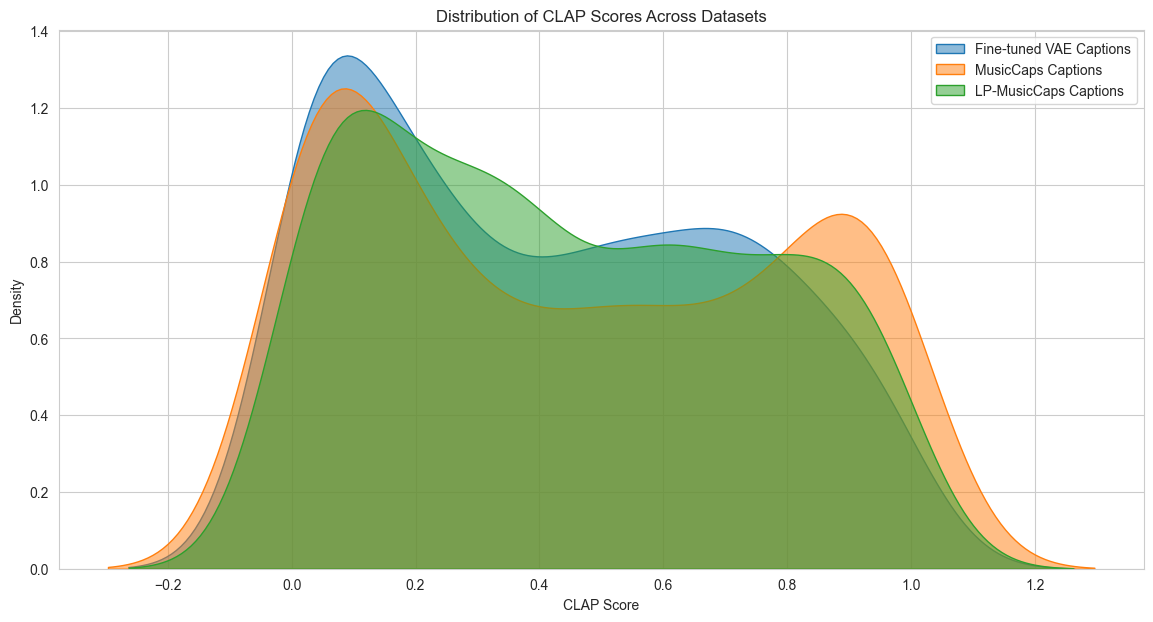

In [24]:
labels = ['Fine-tuned VAE Captions', 'MusicCaps Captions', 'LP-MusicCaps Captions']
plt.figure(figsize=(14, 7))
for m, label in zip(datasets, labels):
    sns.kdeplot(predictions[m]['clap_score'], label=label, fill=True, alpha=0.5)
plt.title('Distribution of CLAP Scores Across Datasets')
plt.xlabel('CLAP Score')
plt.ylabel('Density')
plt.legend()
plt.show()
